<a href="https://colab.research.google.com/github/saatviknagpal/Hacktoberfest-2021/blob/main/MSPP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Stock Market Prediction And Forecasting Using Stacked LSTM

In [140]:
### Keras and Tensorflow >2.0

In [141]:
### Data Collection
import pandas_datareader as pdr
import tensorflow as tf
# key=""    
#yahoo finance as data source
!pip install yfinance
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [142]:
# df = pdr.get_data_tiingo('AAPL', api_key=key)
stock_symbol = 'GOOGL'
data = yf.download(tickers=stock_symbol,period='5y',interval='1d')

[*********************100%***********************]  1 of 1 completed


In [143]:
#   df.to_csv('AAPL.csv')

In [144]:
# import pandas as pd

In [145]:
# df=pd.read_csv('AAPL.csv')
data.head()
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-23 00:00:00-05:00,97.949997,100.040001,97.500000,99.790001,99.790001,40005100
2023-01-24 00:00:00-05:00,98.099998,99.610001,97.199997,97.699997,97.699997,33078500
2023-01-25 00:00:00-05:00,95.570000,96.160004,93.760002,95.220001,95.220001,42330000
2023-01-26 00:00:00-05:00,96.500000,97.570000,95.379997,97.519997,97.519997,30114000
2023-01-27 00:00:00-05:00,97.309998,100.320000,97.309998,99.370003,99.370003,33850200


In [146]:
df1=data[['Open']]

In [147]:
df1

,Open
Date,
2018-01-29 00:00:00-05:00,59.400002
2018-01-30 00:00:00-05:00,58.886002
2018-01-31 00:00:00-05:00,59.190498
2018-02-01 00:00:00-05:00,58.799500
2018-02-02 00:00:00-05:00,56.370998
...,...
2023-01-23 00:00:00-05:00,97.949997
2023-01-24 00:00:00-05:00,98.099998
2023-01-25 00:00:00-05:00,95.570000


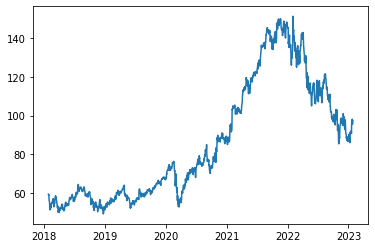

In [148]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [149]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [150]:
import numpy as np

In [151]:
df1

,Open
Date,
2018-01-29 00:00:00-05:00,59.400002
2018-01-30 00:00:00-05:00,58.886002
2018-01-31 00:00:00-05:00,59.190498
2018-02-01 00:00:00-05:00,58.799500
2018-02-02 00:00:00-05:00,56.370998
...,...
2023-01-23 00:00:00-05:00,97.949997
2023-01-24 00:00:00-05:00,98.099998
2023-01-25 00:00:00-05:00,95.570000


In [152]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [153]:
print(df1)

[[0.09980989]
 [0.09477235]
 [0.09775662]
 ...
 [0.45429955]
 [0.46341416]
 [0.47135266]]


In [154]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [155]:
training_size,test_size

(818, 441)

In [156]:
train_data

array([[0.09980989],
       [0.09477235],
       [0.09775662],
       [0.09392457],
       [0.07012367],
       [0.0569859 ],
       [0.02433504],
       [0.04932181],
       [0.03702197],
       [0.02036575],
       [0.03545387],
       [0.03218535],
       [0.03430229],
       [0.04857695],
       [0.05344296],
       [0.05313916],
       [0.06114631],
       [0.06608092],
       [0.06583099],
       [0.07229942],
       [0.07810143],
       [0.0674677 ],
       [0.06136191],
       [0.0360958 ],
       [0.04596999],
       [0.05771605],
       [0.05316854],
       [0.06511556],
       [0.07604327],
       [0.08856361],
       [0.09188603],
       [0.0791305 ],
       [0.08097792],
       [0.08381032],
       [0.06538998],
       [0.05590292],
       [0.05304607],
       [0.04689123],
       [0.0328567 ],
       [0.03247936],
       [0.03899681],
       [0.00861969],
       [0.01317699],
       [0.02121843],
       [0.01559774],
       [0.00681635],
       [0.03041634],
       [0.019

In [157]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [158]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [159]:
print(X_train.shape), print(y_train.shape)

(717, 100)
(717,)


(None, None)

In [160]:
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [161]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [162]:
### Create the Stacked LSTM model
import numpy as np
np.random.seed(1337)  # for reproducibility
from keras.models import Sequential
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [163]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [164]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_10 (LSTM)              (None, 100, 50)           20200     
                                                                 
 lstm_11 (LSTM)              (None, 50)                20200     
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [165]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_10 (LSTM)              (None, 100, 50)           20200     
                                                                 
 lstm_11 (LSTM)              (None, 50)                20200     
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [166]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 10s 395ms/step - loss: 0.0155 - val_loss: 0.0529
Epoch 2/100
12/12 [==============================] - 4s 376ms/step - loss: 0.0035 - val_loss: 0.0088
Epoch 3/100
12/12 [==============================] - 5s 431ms/step - loss: 0.0018 - val_loss: 0.0370
Epoch 4/100
12/12 [==============================] - 6s 480ms/step - loss: 0.0015 - val_loss: 0.0046
Epoch 5/100
12/12 [==============================] - 5s 418ms/step - loss: 0.0011 - val_loss: 0.0031
Epoch 6/100
12/12 [==============================] - 4s 375ms/step - loss: 0.0012 - val_loss: 0.0050
Epoch 7/100
12/12 [==============================] - 2s 183ms/step - loss: 0.0011 - val_loss: 0.0073
Epoch 8/100
12/12 [==============================] - 2s 203ms/step - loss: 0.0010 - val_loss: 0.0111
Epoch 9/100
12/12 [==============================] - 3s 242ms/step - loss: 0.0010 - val_loss: 0.0083
Epoch 10/100
12/12 [==============================] - 3s 227ms/step - loss: 9.6126e-04 - v

In [167]:
import tensorflow as tf

In [168]:
tf.__version__

'2.9.2'

In [169]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 0s 31ms/step


In [170]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [171]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

70.30611525700644

In [172]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

124.44904755006874

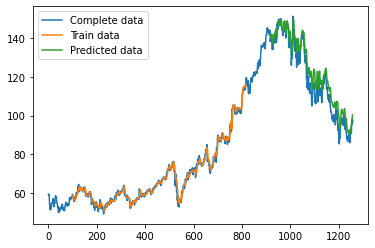

In [173]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)

plt.legend(labels = ['Complete data', 'Train data', 'Predicted data'])
plt.show()

In [174]:
len(test_data)

441

In [175]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape


(1, 100)

In [176]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [177]:
temp_input

[0.5692612582339627,
 0.5669090472824085,
 0.5765137217352687,
 0.5866083840565739,
 0.605425623030641,
 0.5741615855567757,
 0.5425054381512568,
 0.5372130756698517,
 0.5180038015371919,
 0.5148675950415142,
 0.5181018290201054,
 0.5140835247243294,
 0.4861516739389076,
 0.4940901802744852,
 0.47909519063036715,
 0.49213007925458435,
 0.4746849259490598,
 0.48438755311177245,
 0.4688045481162964,
 0.4659623492962976,
 0.5020287613831236,
 0.4960503560674469,
 0.5043808975616169,
 0.4962463362602126,
 0.4879157947660427,
 0.47252876996333243,
 0.471254711777703,
 0.4501832893349949,
 0.49761842192875533,
 0.48654370909749994,
 0.5283924715341759,
 0.4978144768945821,
 0.49771644941166865,
 0.47664502696896066,
 0.5153576576830199,
 0.5261383628385963,
 0.46272811531770636,
 0.44400882905349154,
 0.4219573561008331,
 0.4528294331891671,
 0.4531234408648462,
 0.4089225422496769,
 0.3636434908685829,
 0.3546269065401417,
 0.37305211035561653,
 0.38892919779983254,
 0.38451885834546434,
 0

In [178]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.49761924]
101
1 day input [0.56690905 0.57651372 0.58660838 0.60542562 0.57416159 0.54250544
 0.53721308 0.5180038  0.5148676  0.51810183 0.51408352 0.48615167
 0.49409018 0.47909519 0.49213008 0.47468493 0.48438755 0.46880455
 0.46596235 0.50202876 0.49605036 0.5043809  0.49624634 0.48791579
 0.47252877 0.47125471 0.45018329 0.49761842 0.48654371 0.52839247
 0.49781448 0.49771645 0.47664503 0.51535766 0.52613836 0.46272812
 0.44400883 0.42195736 0.45282943 0.45312344 0.40892254 0.36364349
 0.35462691 0.37305211 0.3889292  0.38451886 0.42176138 0.445675
 0.4495952  0.48066333 0.47713509 0.46802048 0.48566161 0.47115668
 0.45802377 0.46919651 0.48046728 0.46870652 0.45586769 0.44694906
 0.50771308 0.48840586 0.49183607 0.49085602 0.46253214 0.4524374
 0.43665834 0.42626967 0.475763   0.45067328 0.43038593 0.40715842
 0.40225809 0.38118667 0.39069332 0.38167673 0.37138602 0.38794915
 0.37011196 0.36658372 0.37011196 0.3956916  0.40314012 0.37491426
 0.36824981 0.38363684 0.3603113  0.

In [179]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [180]:
import matplotlib.pyplot as plt

In [181]:
len(df1)

1259

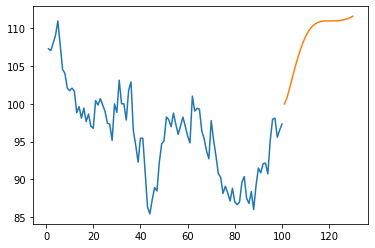

In [182]:
plt.plot(day_new,scaler.inverse_transform(df1[1159:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

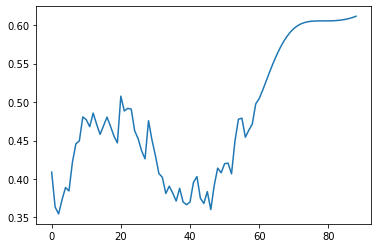

In [183]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [184]:
df3=scaler.inverse_transform(df3).tolist()

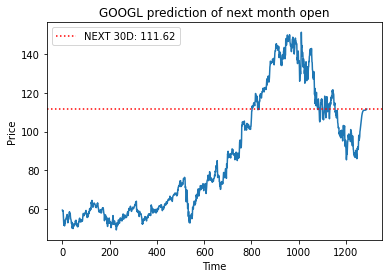

In [185]:
plt.plot(df3)
plt.ylabel("Price")
plt.xlabel("Time")
plt.title("{0} prediction of next month open".format(stock_symbol))
plt.axhline(y=df3[len(df3)-1], color = 'red', linestyle = ':', label = 'NEXT 30D: {0}'.format(round(float(*df3[len(df3)-1]),2)))
plt.legend()
